# Solvers ⚙️

In this exercise, you will investigate the effects of different `solvers` on `LogisticRegression` models.

👇 Run the code below

In [1]:
import pandas as pd

df = pd.read_csv("data.csv")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality rating
0,9.47,5.97,7.36,10.17,6.84,9.15,9.78,9.52,10.34,8.80,6
1,10.05,8.84,9.76,8.38,10.15,6.91,9.70,9.01,9.23,8.80,7
2,10.59,10.71,10.84,10.97,9.03,10.42,11.46,11.25,11.34,9.06,4
3,11.00,8.44,8.32,9.65,7.87,10.92,6.97,11.07,10.66,8.89,8
4,12.12,13.44,10.35,9.95,11.09,9.38,10.22,9.04,7.68,11.38,3


- The dataset consists of different wines 🍷
- The features describe different properties of the wines 
- The target 🎯 is a quality rating given by an expert

## 1. Target engineering

In this section, you are going to transform the ratings into a binary target.

👇 How many observations are there for each rating?

In [4]:
df["quality rating"].nunique()

10

👇 Create `y` by transforming the target into a binary classification task where quality ratings below 6 are bad [0], and ratings of 6 and above are good [1]

In [76]:
y = df["quality rating"].map(lambda x: 0 if x < 6 else 1)
y.head(3)

0    1
1    1
2    0
Name: quality rating, dtype: int64

👇 Check the class balance of the new binary target

In [27]:
good_wines = y.sum()

49990

In [30]:
bad_wines = len(y)-y_sum
balance = good_wines/bad_wines
balance

0.9996000799840032

Create your `X` by scaling the features. This will allow for fair comparison of different solvers.

In [51]:
X = df.copy().drop(columns=["quality rating"])
X.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
0,9.47,5.97,7.36,10.17,6.84,9.15,9.78,9.52,10.34,8.80
1,10.05,8.84,9.76,8.38,10.15,6.91,9.70,9.01,9.23,8.80
2,10.59,10.71,10.84,10.97,9.03,10.42,11.46,11.25,11.34,9.06


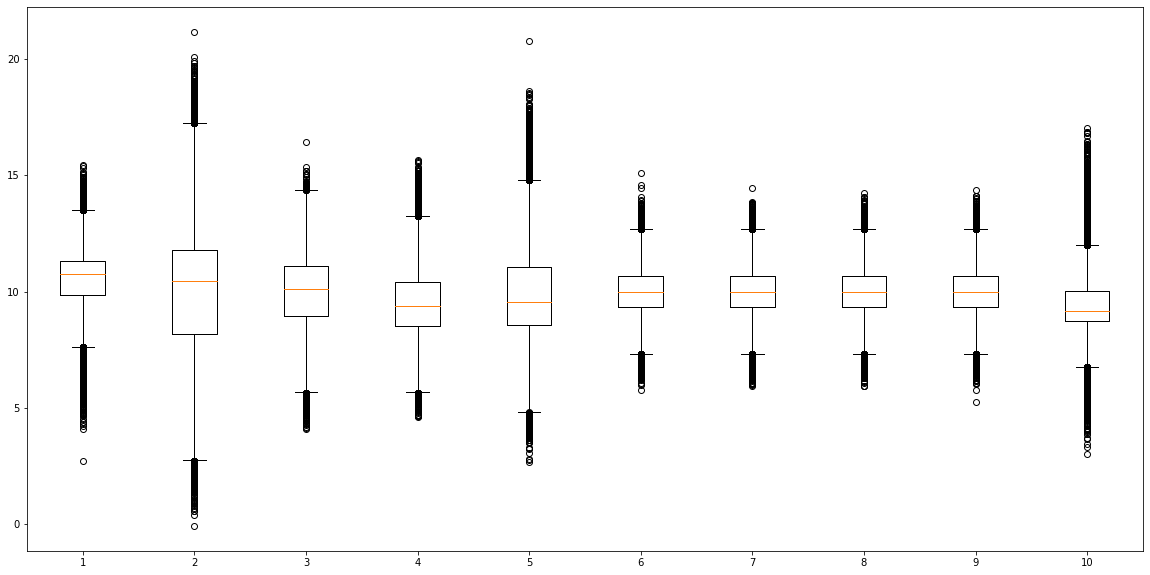

In [42]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,10))
# Boxplot
bp = ax.boxplot(df.iloc[:,:-1].values, widths=0.4)
plt.show()

In [55]:
from sklearn.preprocessing import RobustScaler
r_scaler = RobustScaler().fit(X)
X_scaled = r_scaler.transform(X)
X_scaled

array([[-0.88435374, -1.23140496, -1.25229358, ..., -0.35820896,
         0.25185185, -0.28244275],
       [-0.48979592, -0.44077135, -0.15137615, ..., -0.73880597,
        -0.57037037, -0.28244275],
       [-0.12244898,  0.07438017,  0.3440367 , ...,  0.93283582,
         0.99259259, -0.08396947],
       ...,
       [-0.36734694,  0.14876033,  0.75688073, ..., -0.10447761,
         0.02962963, -0.38931298],
       [-2.39455782, -1.78787879, -1.40366972, ...,  0.15671642,
        -1.24444444,  0.20610687],
       [ 1.66666667,  0.31680441, -0.62844037, ...,  0.7238806 ,
        -0.48888889,  0.41221374]])

## 2. LogisticRegression solvers

👇 Logistic Regression models can be optimized using different **solvers**. Find out 
- Which is the `fastest_solver` ?
- What can you say about their respective precision score?

`solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']`
 
For more information on these 5 solvers, check out [this stackoverflow thread](https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions)

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

In [146]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

solver_dictionary  = {}
for solver in solvers:
    log_reg = LogisticRegression(solver= solver, max_iter=1000)
    log_reg.fit(X_scaled,y)
    cv_results = cross_validate(log_reg, X_scaled, y, cv=5)
    solver_dictionary.update({solver: cv_results})

solver_dictionary.keys()

solver_time = []
for solver in solvers:
    t = solver_dictionary[solver]["fit_time"].mean()
    solver_time.append(t)

time_solver_dict = dict(zip(solvers, solver_time))

def key_val(d):
    min_v = min(d.values())
    for k, v in d.items():
        if min_v == v:
            return k

fastest_solver = key_val(time_solver_dict)

In [176]:
fastest_solver

'lbfgs'

In [177]:
time_solver_dict

{'newton-cg': 0.23136649131774903,
 'lbfgs': 0.057666873931884764,
 'liblinear': 0.1658107280731201,
 'sag': 0.6519134044647217,
 'saga': 1.0477013111114502}

<details>
    <summary>☝️ Intuition</summary>

All solvers should produce similar precision scores because our cost-function is "easy" enough to have a global minimum which is found by all 5 solvers. For very complex cost-functions such as in Deep Learning, different solvers may stopping at different values of the loss function. 

</details> 

###  🧪 Test your code

In [169]:
from nbresult import ChallengeResult

result = ChallengeResult('solvers',
                         fastest_solver=fastest_solver
                         )
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /home/mz/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/mz/code/MaCoZu/data-challenges/05-ML/04-Under-the-hood/02-Solvers
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_solvers.py::TestSolvers::test_fastest_solver PASSED           [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/solvers.pickle

git commit -m 'Completed solvers step'

git push origin master


## 3. Stochastic Gradient Descent

Logistic Regression models can also be optimized via Stochastic Gradient Descent.

👇 Evaluate a Logistic Regression model optimized via **Stochastic Gradient Descent**. How do its precision score and training time compare to the performance of the models trained in section 2.?


<details>
<summary>💡 Hint</summary>

- If you are stuck, look at the [SGDClassifier doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)!

</details>



In [178]:
from sklearn.linear_model import SGDClassifier


log_reg2 = SGDClassifier(loss='log', max_iter=100)
log_reg2.fit(X_scaled, y)
cv_results_log_reg = cross_validate(log_reg2, X_scaled, y, cv=5)

In [179]:
cv_results_log_reg

{'fit_time': array([0.13083577, 0.15037966, 0.19524646, 0.21405387, 0.15752602]),
 'score_time': array([0.01076746, 0.00710917, 0.00378036, 0.00264621, 0.00291753]),
 'test_score': array([0.86025, 0.85835, 0.86075, 0.8571 , 0.86185])}

In [180]:
time_log_reg = cv_results_log_reg["fit_time"].mean()
time_log_reg

0.16960835456848145

☝️ The SGD model should have the shortest training time, for similar performance. This is a direct effect of performing each epoch of the Gradient Descent on a single data point.

## 4. Predictions

👇 Use the best model to predict the binary quality (0 or 1) of the following wine. Store your
- `predicted_class`
- `predicted_proba_of_class`

In [226]:
new_data = pd.read_csv('new_data.csv')
X_new = new_data

In [227]:
X_new_scaled = r_scaler.transform(X_new)

In [234]:
predicted_class = log_reg2.predict(X_new_scaled)
predicted_class

array([0])

In [232]:
predicted_proba_of_class = log_reg2.predict_proba(X_new_scaled)[0][0]
predicted_proba_of_class

0.9691618853493293

# 🏁  Check your code and push your notebook

In [233]:
from nbresult import ChallengeResult

result = ChallengeResult('new_data_prediction',
    predicted_class=predicted_class,
    predicted_proba_of_class=predicted_proba_of_class
)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /home/mz/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/mz/code/MaCoZu/data-challenges/05-ML/04-Under-the-hood/02-Solvers
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 2 items

tests/test_new_data_prediction.py::TestNewDataPrediction::test_predicted_class PASSED [ 50%]
tests/test_new_data_prediction.py::TestNewDataPrediction::test_predicted_proba PASSED [100%]

============================== 2 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/new_data_prediction.pickle

git commit -m 'Completed new_data_prediction step'

git push origin master
